In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import cv2
import sc2

%pylab inline

sc2.utils.jit.enable()
sc2.utils.imageio.configurate("default_show_mode", "plt")

Populating the interactive namespace from numpy and matplotlib


# Original Image

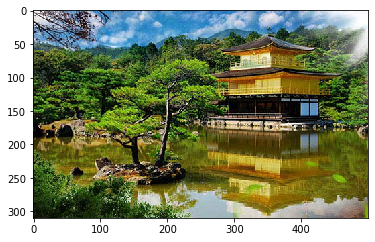

In [2]:
image = sc2.utils.image_load("jinge")
sc2.utils.image_show(image)

In [3]:
backup = np.copy(image)

In [4]:
# decide how many seams to remove
steps = int(image.shape[1] * 0.4)

# Original Seam Carving

100%|██████████| 200/200 [00:09<00:00, 21.91it/s]


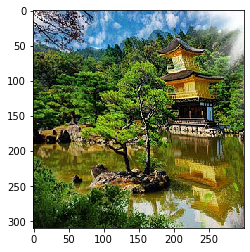

In [5]:
image = np.copy(backup)

# remove seams normally
for i in tqdm.tqdm(range(steps)):
    energy = sc2.energy.laplacian(image)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)

sc2.utils.image_show(image)

# Seam Carving with mask protection

100%|██████████| 200/200 [00:04<00:00, 41.25it/s]


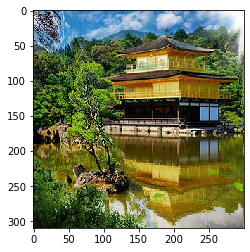

In [6]:
image = np.copy(backup)

# remove seams with mask protection
mask = sc2.utils.draw_mask(image)
for i in tqdm.tqdm(range(steps)):
    energy = sc2.energy.laplacian(image)
    energy = sc2.energy.protect_mask(energy, mask)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)
    mask = sc2.seamops.remove_seam(mask, seam)

sc2.utils.image_show(image)

### Comparation：the building is well-preserved.

 # Another Example

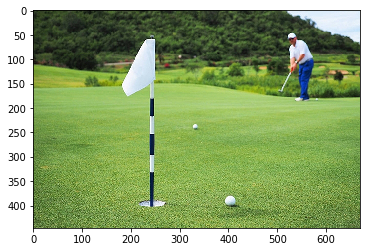

In [7]:
image = sc2.utils.image_load("golf")
sc2.utils.image_show(image)

In [8]:
backup = np.copy(image)

# Original Seam Carving

100%|██████████| 46/46 [00:02<00:00, 21.48it/s]


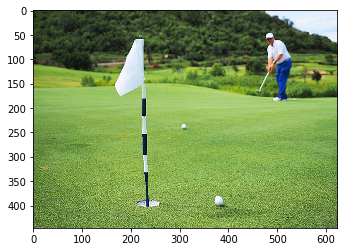

In [13]:
image = np.copy(backup)

# remove seams normally
for i in tqdm.tqdm(range(steps)):
    energy = sc2.energy.laplacian(image)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)

sc2.utils.image_show(image)

# Object Removal

100%|██████████| 46/46 [00:02<00:00, 19.88it/s]


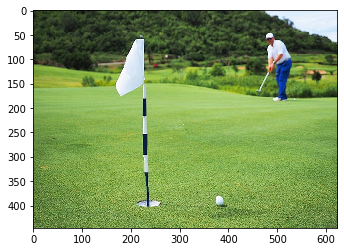

In [14]:
image = np.copy(backup)

# remove seams with mask removal
mask = sc2.utils.draw_mask(image)
for i in tqdm.tqdm(range(steps)):
    energy = sc2.energy.laplacian(image)
    energy = sc2.energy.remove_mask(energy, mask)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)
    mask = sc2.seamops.remove_seam(mask, seam)

sc2.utils.image_show(image)

### Comparation：the ball is removed perfectly.